In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams["figure.figsize"] = (12, 10)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
file = tf.keras.utils
raw_df = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
)
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Statistical analysis

raw_df[
    ["Time", "V1", "V2", "V3", "V4", "V5", "V26", "V27", "V28", "Amount", "Class"]
].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
neg, pos = np.bincount(raw_df["Class"]) # Positive and Negative examples
total = neg + pos # Total number of examples
print(
    f"Examples:\n    Total: {total}\n    Positive: {pos} ({pos / total *100:.2f}% of Total)"
)

Examples:
    Total: 284807
    Positive: 492 (0.17% of Total)


In [6]:
cleaned_df = raw_df.copy()

cleaned_df.pop("Time") # Time is not relevant, it's removed

cleaned_df["Log Amount"] = np.log(cleaned_df.pop("Amount") + 0.001) # Logarithm of the amount

In [7]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2) # Train and test split
train_df, val_df = train_test_split(train_df, test_size=0.2) # Train and validation split using the train set

train_labels = np.array(train_df.pop("Class")) # Numpy array with the label
val_labels = np.array(val_df.pop("Class")) # for every set
test_labels = np.array(test_df.pop("Class"))
bool_train_labels = train_labels != 0 # Boolean array

train_features = np.array(train_df) # Array with features, which are all the columns except the class
val_features = np.array(val_df)
test_features = np.array(test_df)

In [8]:
print(f"Average class probability in the train set: {train_labels.mean():.4f}")
print(f"Average class probability in the test set: {test_labels.mean():.4f}")
print(f"Average class probability in the validation set: {val_labels.mean():.4f}") # The results are reasonable taking into account the original distribution

Average class probability in the train set: 0.0017
Average class probability in the test set: 0.0017
Average class probability in the validation set: 0.0019


In [9]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features) # Scaler fit only on the training set

val_features = scaler.transform(val_features) # Transform for the other sets
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5) # This avoids outliers, shrinking them between the range
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

# Labels
print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

# Features
print("Training features shape:", train_features.shape)
print("Validation features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


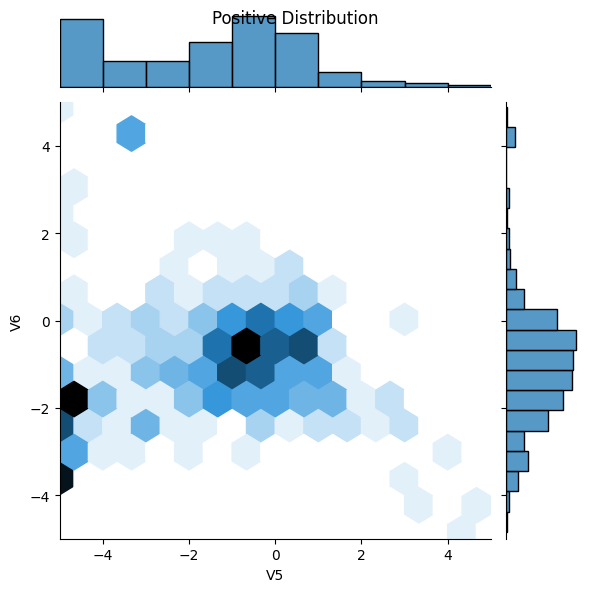

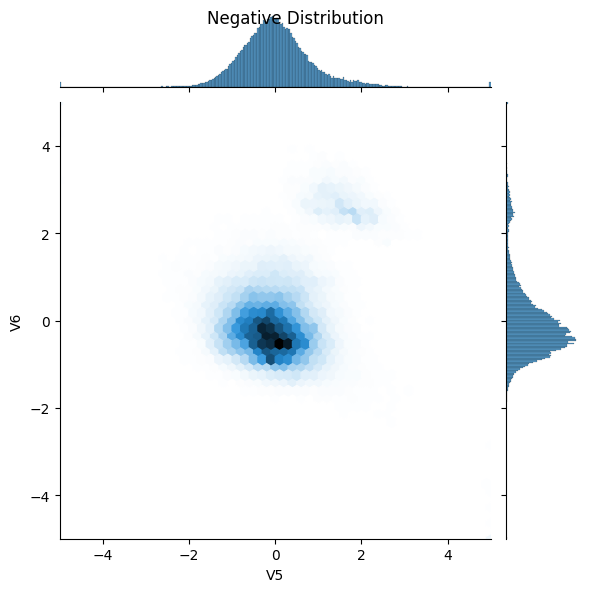

In [10]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['V5'], y=pos_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle('Positive Distribution')

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle('Negative Distribution')

The positive examples contain much higher rate of extreme values

In [11]:
METRICS = [
    # For probability predictions
    keras.metrics.BinaryCrossentropy(name='cross entropy'), # Loss function
    keras.metrics.MeanSquaredError(name='Brier score'), # Mean squared error between the predicted probability and the actual label
    # For deterministic 0/1 predictions
    keras.metrics.TruePositives(name='tp'), # Correctly predicted positive examples
    keras.metrics.FalsePositives(name='fp'), # Error type I - Predicted positive but actually negative
    keras.metrics.TrueNegatives(name='tn'), # Correctly predicted negative examples
    keras.metrics.FalseNegatives(name='fn'), # Error type II - Predicted negative but actually positive
    keras.metrics.BinaryAccuracy(name='accuracy'), # TN + TP / total
    keras.metrics.Precision(name='precision'), # TP / (TP + FP)
    keras.metrics.Recall(name='recall'), # TP / (TP + FN)
    # Other
    keras.metrics.AUC(name='auc'), # Area Under the Curve of the Receiver Operating Characteristic (ROC) curve
    keras.metrics.AUC(name='prc', curve='PR') # Area Under the Curve of the Precision-Recall curve
]

def make_model(metrics=METRICS, output_bias=None): # output_bias is used in imbalanced datasets
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)  # Convert output_bias to a constant initializer
    model = keras.Sequential([  # Create a sequential model
        keras.layers.Dense(16, activation='relu',  # First layer: 16 neurons with Rectified Linear Unit (ReLU) activation. A Dense layer is a fully connected layer
                           input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),  # Dropout is a regularization technique to prevent overfitting
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),  # Output layer: 1 neuron for binary classification with sigmoid activation
    ])

    model.compile(  # Compile the model
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),  # Adam optimizer with learning rate 0.001
        loss=keras.losses.BinaryCrossentropy(),  # Binary cross-entropy loss function
        metrics=metrics  # Use provided metrics for model evaluation
    )

    return model

## Baseline Model
### Model Building

In [12]:
EPOCHS = 100 # Number of times the entire dataset is passed through the neural network during training
BATCH_SIZE = 2048 # Number of examples used in each iteration. It's greater than default due to the imbalanced nature of the dataset.

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True) # Stop training when a monitored metric has stopped improving

In [13]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.predict(train_features[:10]) # Predictions before training

1/1 [==============================] - 0s 253ms/step


array([[0.37133488],
       [0.43957162],
       [0.36433282],
       [0.6434792 ],
       [0.3252287 ],
       [0.51398575],
       [0.77871776],
       [0.15613583],
       [0.58981776],
       [0.2995191 ]], dtype=float32)

Well, the initial guesses are pretty bad. I'll apply the the [Karpathy's Recipe for Training Neural Networks](http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines)

> **init well.** Initialize the final layer weights correctly. E.g. if you are regressing some values that have a mean of 50 then initialize the final bias to 50. If you have an imbalanced dataset of a ratio 1:10 of positives:negatives, set the bias on your logits such that your network predicts probability of 0.1 at initialization. Setting these correctly will speed up convergence and eliminate “hockey stick” loss curves where in the first few iteration your network is basically just learning the bias. (Karpathy)

With the default bias initialization the loss should be about $\log(2)=0.69314$.

In [15]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.8010


The correct bias can be derived from:
$$ p_0=\frac{pos}{pos+neg} =1 / e^{-b_0}$$
$$ b_0 = -\log_e(\frac 1{p_0}-1)$$
$$ b_0=\log_e(\frac{pos}{neg}) $$

In [16]:
initial_bias = np.log([pos/neg])  # as per the equation
initial_bias

array([-6.35935934])

In [17]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

1/1 [==============================] - 0s 63ms/step


array([[0.00406526],
       [0.00120316],
       [0.00411492],
       [0.00078752],
       [0.00070564],
       [0.0041738 ],
       [0.00036565],
       [0.00320561],
       [0.00477516],
       [0.00243554]], dtype=float32)

With this initialization we must expect the loss to be:
$$-p_0\log(p_0)-(1-p_0)\log(1-p_0)=0.0137$$

In [18]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0129


In [19]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights.weights.h5')
model.save_weights(initial_weights) # This is to make future runs more comparable.

In [20]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0) # Training further for 20 epochs

In [21]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

In [24]:
def plot_loss(history, label, n):
  plt.semilogy(history.epoch, history.history['loss'], color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'], color=colors[n], label="Val " + label, linestyle="--")
  plt.xlabel("Epoch")
  plt.ylabel('Loss')
  plt.legend()

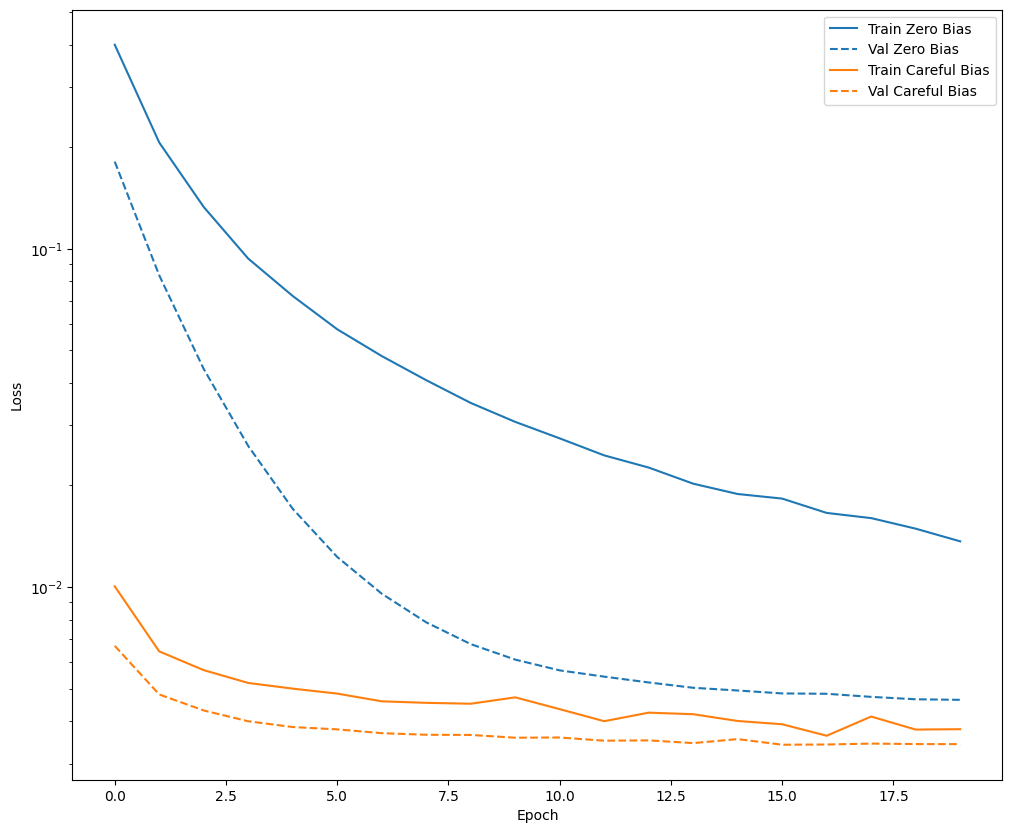

In [25]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

It's clear that the careful initialization has an advantage.

## Training the Model

In [26]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels)
    )


Epoch 1/100
90/90 [==============================] - 3s 14ms/step - loss: 0.0100 - cross entropy: 0.0087 - Brier score: 0.0013 - tp: 96.0000 - fp: 10.0000 - tn: 227439.0000 - fn: 300.0000 - accuracy: 0.9986 - precision: 0.9057 - recall: 0.2424 - auc: 0.7852 - prc: 0.3820 - val_loss: 0.0069 - val_cross entropy: 0.0069 - val_Brier score: 0.0014 - val_tp: 9.0000 - val_fp: 1.0000 - val_tn: 45480.0000 - val_fn: 79.0000 - val_accuracy: 0.9982 - val_precision: 0.9000 - val_recall: 0.1023 - val_auc: 0.8975 - val_prc: 0.7079
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0065 - cross entropy: 0.0065 - Brier score: 0.0010 - tp: 109.0000 - fp: 18.0000 - tn: 181950.0000 - fn: 199.0000 - accuracy: 0.9988 - precision: 0.8583 - recall: 0.3539 - auc: 0.8776 - prc: 0.5402 - val_loss: 0.0048 - val_cross entropy: 0.0048 - val_Brier score: 8.4160e-04 - val_tp: 49.0000 - val_fp: 6.0000 - val_tn: 45475.0000 - val_fn: 39.0000 - val_accuracy: 0.9990 - val_precision: 0.8909 - val_re

In [27]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_", " ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8, 1])
    else:
      plt.ylim([0, 1])

    plt.legend()

SyntaxError: incomplete input (<ipython-input-27-8eb745d796f8>, line 12)